## Convolutional Neural Network (CNN)

## Load the libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load and reshape the data and normalize

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # many data set are included in keras

x_train = x_train.reshape(-1,28,28,1)
x_test  = x_test.reshape(-1,28,28,1)

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test  :  (10000, 28, 28, 1)
y_test  :  (10000,)


## Creation of CNN model

In [3]:
model_cnn = keras.models.Sequential()

model_cnn.add( keras.layers.Input((28,28,1)) )

model_cnn.add( keras.layers.Conv2D(8, (3,3),  activation='relu') )
model_cnn.add( keras.layers.MaxPooling2D((2,2)))
model_cnn.add( keras.layers.Dropout(0.2))

model_cnn.add( keras.layers.Conv2D(16, (3,3), activation='relu') )
model_cnn.add( keras.layers.MaxPooling2D((2,2)))
model_cnn.add( keras.layers.Dropout(0.2))

model_cnn.add( keras.layers.Flatten()) 
model_cnn.add( keras.layers.Dense(100, activation='relu'))
model_cnn.add( keras.layers.Dropout(0.5))

model_cnn.add( keras.layers.Dense(10, activation='softmax'))

In [4]:
model_cnn.summary()

model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 16)          0

With the CNN, the number of parameters is divided by 2, almost 90,000 for the DNN against 42 358 for the CNN.

model_cnn.add( keras.layers.Conv2D(8, (3,3),  activation='relu') )
means  a convolution layer with 2 dimensions, the kernel size is (3,3) and the activation fonction is 'relu'. The number of parameters of this layer 8*(3x3+1) '8' for the number of convolution, '3x3' is the dimension of kernel and '1' the bias

## Train the model

In [5]:
batch_size  = 512
epochs      =  16

history = model_cnn.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1,
                      validation_data = (x_test, y_test))

Epoch 1/16
118/118 [==============================] - 14s 113ms/step - loss: 1.0986 - accuracy: 0.6318 - val_loss: 0.2943 - val_accuracy: 0.9237
Epoch 2/16
118/118 [==============================] - 13s 113ms/step - loss: 0.4116 - accuracy: 0.8718 - val_loss: 0.1533 - val_accuracy: 0.9567
Epoch 3/16
118/118 [==============================] - 13s 107ms/step - loss: 0.2846 - accuracy: 0.9133 - val_loss: 0.1122 - val_accuracy: 0.9670
Epoch 4/16
118/118 [==============================] - 9s 77ms/step - loss: 0.2294 - accuracy: 0.9303 - val_loss: 0.0902 - val_accuracy: 0.9736
Epoch 5/16
118/118 [==============================] - 8s 69ms/step - loss: 0.1990 - accuracy: 0.9386 - val_loss: 0.0777 - val_accuracy: 0.9772
Epoch 6/16
118/118 [==============================] - 9s 76ms/step - loss: 0.1780 - accuracy: 0.9462 - val_loss: 0.0703 - val_accuracy: 0.9783
Epoch 7/16
118/118 [==============================] - 9s 73ms/step - loss: 0.1658 - accuracy: 0.9496 - val_loss: 0.0616 - val_accuracy: 

## Evaluate the model

In [6]:
score_cnn = model_cnn.evaluate(x_test, y_test, verbose=0)

print(f'Test loss     : {score_cnn[0]:4.4f}')
print(f'Test accuracy : {score_cnn[1]:4.4f}')

Test loss     : 0.0418
Test accuracy : 0.9866


## Plot

With a DNN, we had a precision of the order of : 97.7%

<AxesSubplot:title={'center':'Rate_validation acoording the number of epochs'}, xlabel='epochs', ylabel='rate_validity'>

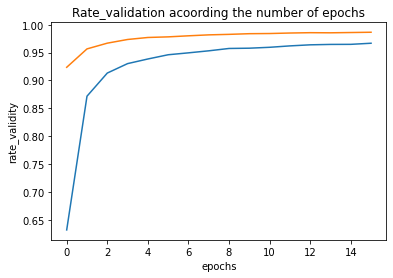

In [7]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)

# use Pandas native plot method
plt.xlabel("epochs")
plt.ylabel("rate_validity")
plt.title("Rate_validation acoording the number of epochs")
history_df['accuracy'].plot()
history_df['val_accuracy'].plot()

## Plot results

313/313 [==============================] - 1s 3ms/step
tf.Tensor(
[[ 974    0    0    0    0    1    2    2    1    0]
 [   0 1129    1    2    0    1    2    0    0    0]
 [   1    0 1021    0    1    0    0    8    1    0]
 [   0    0    2  992    0   10    0    4    2    0]
 [   0    1    0    0  969    0    1    0    2    9]
 [   2    0    0    2    0  884    2    1    1    0]
 [   6    2    0    0    1    4  943    0    2    0]
 [   0    1    7    2    0    0    0 1013    0    5]
 [   3    1    2    1    2    3    0    4  952    6]
 [   2    2    0    2    6    2    0    5    1  989]], shape=(10, 10), dtype=int32)


<AxesSubplot:>

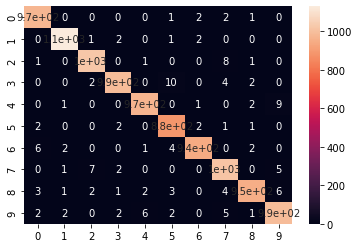

In [8]:
y_sigmoid = model_cnn.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)

cf_matrix=tf.math.confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)

## Plot some errors

In [ ]:
images = xtest.reshape((-1, 28, 28))

# poorly predicted data are recovered 
misclass = (y_test != y_pred)
misclass_images = images[misclass,:,:]
misclass_predicted = y_pred[misclass]

# a sample of these images is selected
select = np.random.randint(misclass_images.shape[0], size=12)

# the images and the (erroneous) predictions associated with these images are displayed
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(misclass_predicted[value]) )

plt.show()